# Teste de Kolmogorov-Smirnov

O Teste de Kolmogorov-Smirnov (KS) é um método estatístico utilizado para determinar se uma amostra segue uma distribuição de probabilidade específica. Ele compara a função de distribuição empírica (EDF) dos dados observados com a função de distribuição acumulada (CDF) da distribuição teórica. Este teste é útil para avaliar a adequação de um modelo teórico aos dados observados.


O teste KS calcula a estatística D de Kolmogorov-Smirnov, que é a maior diferença absoluta entre as funções de distribuição empírica e teórica. Comparamos essa estatística com um valor crítico para determinar se os dados observados seguem a distribuição teórica.

## Resultados Esperados

- Se a estatística D for menor que o valor crítico, podemos aceitar a hipótese nula de que os dados seguem a distribuição teórica.
- Se a estatística D for maior que o valor crítico, há evidências de que os dados observados não seguem a distribuição teórica.



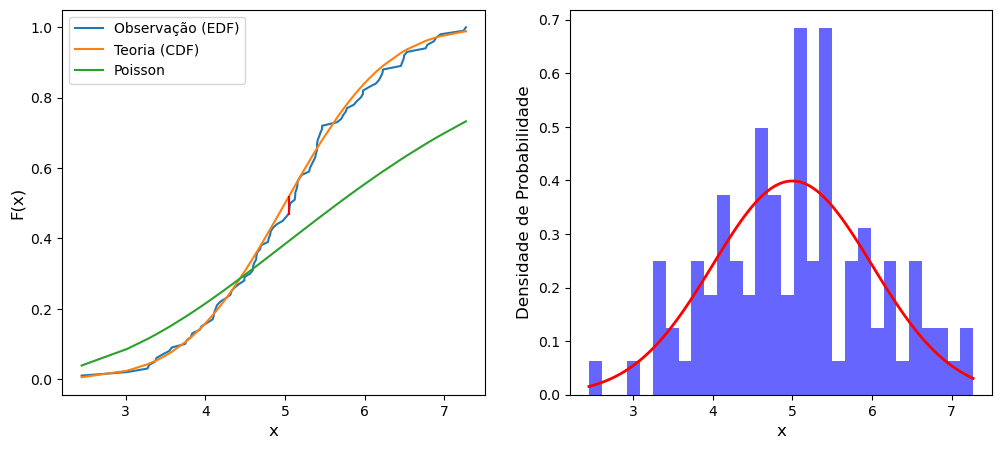

NameError: name 'dn_ks' is not defined

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy.random import seed

# Definir média e desvio padrão para a distribuição normal
mu = 5
sigma = 1
# Definir uma semente (por exemplo, tornar este exemplo reproduzível)
seed(0)
step = 2

# Passo 1: Gerar dados e plotar gráficos de PDF e histograma
if step == 1:
    # Criar uma figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Gerar uma amostra de uma distribuição normal
    arr_1_more = np.random.normal(mu, sigma, size=6000)
    arr_1_sorted = np.sort(arr_1_more)
    norm_data = st.norm.pdf(arr_1_sorted, mu, sigma)  # PDF normal
    poisson_pmf = st.poisson.pmf(mu, arr_1_sorted)  # PMF de Poisson
    # Plotar PDF normal e PMF de Poisson
    ax1.plot(arr_1_sorted, norm_data, label="Normal PDF")
    ax1.plot(arr_1_sorted, poisson_pmf, label="Poisson PMF")
    ax1.set_xlabel("x", size=12)
    ax1.set_ylabel("F(x)", size=12)
    ax1.legend()

    # Plotar histograma dos dados
    ax2.hist(arr_1_more, bins=30, density=True, alpha=0.6, color='b')
    x = np.linspace(min(arr_1_sorted), max(arr_1_sorted), 100)
    ax2.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normal PDF')
    ax2.set_xlabel("x", size=12)
    ax2.set_ylabel("Densidade de Probabilidade", size=12)
    ax2.legend()

    plt.show()

# Gerar array aleatório
if step > 1:
    mysize = 100
    arr_1_few = np.random.normal(mu, sigma, size=mysize)
    # Ordenar array gerado
    arr_1_sorted = np.sort(arr_1_few)
    # EDF (Função de Distribuição Empírica)
    arr_1_edf_few = np.arange(1, len(arr_1_few) + 1) / len(arr_1_few)
    # Gerar conjunto de dados que segue uma distribuição de Poisson com média=mu
    poisson_cdf = 1 - st.poisson.cdf(mu, arr_1_sorted)
    # Criar uma figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    # Plotar EDF e CDF normal
    ax1.plot(arr_1_sorted, arr_1_edf_few, label="Observação (EDF)")
    y_cdf = st.norm.cdf(arr_1_sorted, mu, sigma)  # CDF normal
    norm_data = st.norm.pdf(arr_1_sorted, mu, sigma)  # PDF normal
    ax1.plot(arr_1_sorted, y_cdf, label="Teoria (CDF)")
    ax1.plot(arr_1_sorted, poisson_cdf, label="Poisson")
    ax1.set_xlabel("x", size=12)
    ax1.set_ylabel("F(x)", size=12)

    # Plotar PDF
    ax2.hist(arr_1_few, bins=30, density=True, alpha=0.6, color='b')
    x = np.linspace(min(arr_1_sorted), max(arr_1_sorted), 100)
    ax2.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normal PDF')
    ax2.set_xlabel("x", size=12)
    ax2.set_ylabel("Densidade de Probabilidade", size=12)

    # Calcular diferença absoluta
    arr_dif_abs = np.abs(y_cdf - arr_1_edf_few)
    # Obter índice da diferença máxima
    max_diff_index = np.argmax(arr_dif_abs)
    # Obter valor da diferença máxima
    max_diff_value = arr_dif_abs[max_diff_index]
    # Plotar linha para a diferença máxima
    ax1.plot([arr_1_sorted[max_diff_index], arr_1_sorted[max_diff_index]],
             [arr_1_edf_few[max_diff_index], y_cdf[max_diff_index]],
             color='red', linestyle='-')

    legend = ax1.legend(loc="upper left")
    plt.show()

    # Teste de Kolmogorov-Smirnov (KS)
    # Comparar distribuição observada com distribuição normal
    if dn_ks < D_critial:
        print("Os dados observados seguem uma distribuição normal.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição normal.")

    # Comparar distribuição observada com distribuição de Poisson
    if ps_ks < D_critial:
        print("Os dados observados seguem uma distribuição de Poisson.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição de Poisson.")
    print("-" * 85)

    print("Diferença em relação à distribuição normal")
    print(arr_dif_abs)
    print("-" * 85)
    # Calcular diferença absoluta para distribuição de Poisson
    arr_dif_abs_poisson = np.abs(y_cdf - poisson_cdf)
    print("Diferença em relação à distribuição de Poisson")
    print(arr_dif_abs_poisson)
    print("-" * 85)
    # Obter diferença máxima
    dn_ks = max(arr_dif_abs)
    ps_ks = max(arr_dif_abs_poisson)
    print("Diferença máxima em relação à distribuição normal:{}".format(dn_ks))
    print("Diferença máxima em relação à distribuição de Poisson:{}".format(ps_ks))

    # Calcular valor crítico no intervalo de confiança de 95%
    D_critial = 1.36 * np.sqrt(2 / mysize)
    print("Valor crítico no intervalo de confiança de 95%:{}".format(D_critial))


# Teste KS com Distribuição Não Normal

## Distribuição Uniforme

A distribuição uniforme é um tipo de distribuição de probabilidade em que todos os valores possíveis de uma variável aleatória têm a mesma probabilidade de ocorrência. Em outras palavras, em uma distribuição uniforme, todos os valores dentro de um intervalo específico são igualmente prováveis de ocorrer.

## Por que o teste não identifica a distribuição uniforme como normal?
- O teste de Kolmogorov-Smirnov (KS) é usado para testar a igualdade de distribuições empíricas ou teóricas. Ele compara uma distribuição de dados observados com uma distribuição de referência, como a distribuição normal. 
- Como a distribuição uniforme não possui a mesma forma característica de uma distribuição normal, o teste KS não a identificará como normal. A distribuição uniforme tem uma densidade de probabilidade constante dentro de um intervalo, enquanto a distribuição normal tem uma forma de sino com valores mais concentrados em torno da média.
- Portanto, o teste KS é capaz de detectar as diferenças na forma da distribuição e, assim, distinguir entre uma distribuição uniforme e uma distribuição normal.




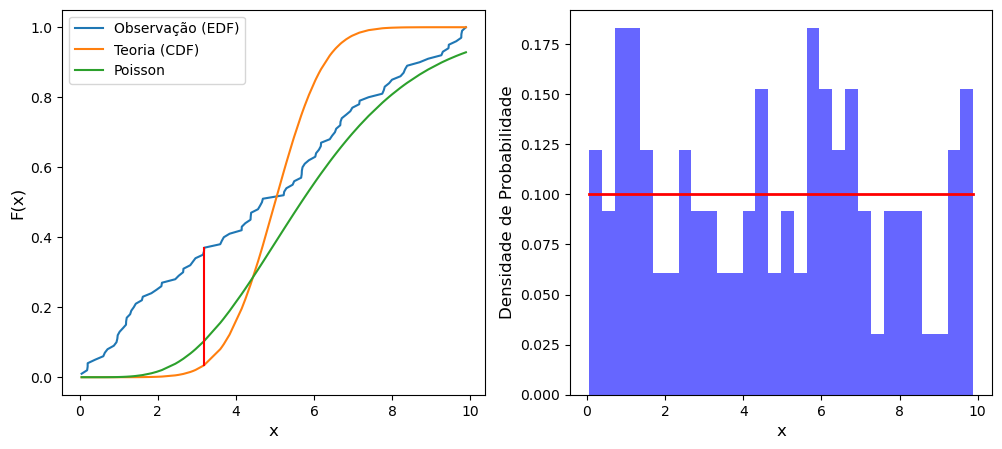

NameError: name 'dn_ks' is not defined

In [27]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy.random import seed

# Definindo média e desvio padrão para a distribuição normal
mu = 5
sigma = 1
# Definindo uma semente (por exemplo, tornar este exemplo reproduzível)
seed(0)
step = 2

# Passo 1: Gerar dados e plotar gráficos de PDF e histograma
if step == 1:
    # Criar uma figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Gerar uma amostra de uma distribuição normal
    arr_1_more = np.random.normal(mu, sigma, size=6000)
    arr_1_sorted = np.sort(arr_1_more)
    norm_data = st.norm.pdf(arr_1_sorted, mu, sigma)  # PDF normal
    poisson_pmf = st.poisson.pmf(mu, arr_1_sorted)  # PMF de Poisson
    # Plotar PDF normal e PMF de Poisson
    ax1.plot(arr_1_sorted, norm_data, label="Normal PDF")
    ax1.plot(arr_1_sorted, poisson_pmf, label="Poisson PMF")
    ax1.set_xlabel("x", size=12)
    ax1.set_ylabel("F(x)", size=12)
    ax1.legend()

    # Plotar histograma dos dados
    ax2.hist(arr_1_more, bins=30, density=True, alpha=0.6, color='b')
    x = np.linspace(min(arr_1_sorted), max(arr_1_sorted), 100)
    ax2.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normal PDF')
    ax2.set_xlabel("x", size=12)
    ax2.set_ylabel("Densidade de Probabilidade", size=12)
    ax2.legend()

    plt.show()

# Gerar array aleatório
if step > 1:
    mysize = 100
    arr_1_few = np.random.uniform(0, 10, size=mysize)  # Gerar array de uma distribuição uniforme
    # Ordenar array gerado
    arr_1_sorted = np.sort(arr_1_few)
    # EDF (Função de Distribuição Empírica)
    arr_1_edf_few = np.arange(1, len(arr_1_few) + 1) / len(arr_1_few)
    # Gerar conjunto de dados que segue uma distribuição de Poisson com média=mu
    poisson_cdf = 1 - st.poisson.cdf(mu, arr_1_sorted)
    # Criar uma figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    # Plotar EDF e CDF normal
    ax1.plot(arr_1_sorted, arr_1_edf_few, label="Observação (EDF)")
    y_cdf = st.norm.cdf(arr_1_sorted, mu, sigma)  # CDF normal
    norm_data = st.norm.pdf(arr_1_sorted, mu, sigma)  # PDF normal
    ax1.plot(arr_1_sorted, y_cdf, label="Teoria (CDF)")
    ax1.plot(arr_1_sorted, poisson_cdf, label="Poisson")
    ax1.set_xlabel("x", size=12)
    ax1.set_ylabel("F(x)", size=12)

    # Plotar PDF
    ax2.hist(arr_1_few, bins=30, density=True, alpha=0.6, color='b')
    x = np.linspace(min(arr_1_sorted), max(arr_1_sorted), 100)
    ax2.plot(x, st.uniform.pdf(x, loc=0, scale=10), 'r-', lw=2, label='Uniform PDF')
    ax2.set_xlabel("x", size=12)
    ax2.set_ylabel("Densidade de Probabilidade", size=12)

    # Calcular diferença absoluta
    arr_dif_abs = np.abs(y_cdf - arr_1_edf_few)
    # Obter índice da diferença máxima
    max_diff_index = np.argmax(arr_dif_abs)
    # Obter valor da diferença máxima
    max_diff_value = arr_dif_abs[max_diff_index]
    # Plotar linha para a diferença máxima
    ax1.plot([arr_1_sorted[max_diff_index], arr_1_sorted[max_diff_index]],
             [arr_1_edf_few[max_diff_index], y_cdf[max_diff_index]],
             color='red', linestyle='-')

    legend = ax1.legend(loc="upper left")
    plt.show()

    # Comparar distribuição observada com distribuição normal
    if dn_ks < D_critial:
        print("Os dados observados seguem uma distribuição normal.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição normal.")

    # Comparar distribuição observada com distribuição de Poisson
    if ps_ks < D_critial:
        print("Os dados observados seguem uma distribuição de Poisson.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição de Poisson.")
    print("-" * 85)

    print("Diferença em relação à distribuição uniforme")
    print(arr_dif_abs)
    print("-" * 85)
    # Calcular diferença absoluta para distribuição de Poisson
    arr_dif_abs_poisson = np.abs(y_cdf - poisson_cdf)
    print("Diferença em relação à distribuição de Poisson")
    print(arr_dif_abs_poisson)
    print("-" * 85)
    # Obter diferença máxima
    dn_ks = max(arr_dif_abs)
    ps_ks = max(arr_dif_abs_poisson)
    print("Diferença máxima em relação à distribuição uniforme:{}".format(dn_ks))
    print("Diferença máxima em relação à distribuição de Poisson:{}".format(ps_ks))

    # Calcular valor crítico no intervalo de confiança de 95%
    D_critial = 1.36 * np.sqrt(2 / mysize)
    print("Valor crítico no intervalo de confiança de 95%:{}".format(D_critial))



---

# Teste de Shapiro-Wilk

O teste de Shapiro-Wilk é uma técnica estatística utilizada para verificar se uma amostra de dados segue uma distribuição normal. Ele avalia a hipótese nula de que os dados foram retirados de uma população com distribuição normal. O teste é baseado na comparação entre os quantis observados e os quantis esperados de uma distribuição normal teórica.


O teste de Shapiro-Wilk calcula a estatística de teste W, que é uma medida da discrepância entre os dados observados e a distribuição normal esperada. O valor p resultante indica a probabilidade de obter uma estatística de teste tão extrema quanto a observada, sob a hipótese nula de normalidade.

## Resultados Esperados

- Se o valor p for maior que um nível de significância especificado (por exemplo, α = 0,05), não rejeitamos a hipótese nula e concluímos que os dados provavelmente seguem uma distribuição normal.
- Se o valor p for menor que o nível de significância, rejeitamos a hipótese nula e concluímos que os dados não seguem uma distribuição normal.




In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy.random import seed

# Definir média e desvio padrão para a distribuição normal
mu = 5
sigma = 1
# Definir uma semente (por exemplo, tornar este exemplo reproduzível)
seed(0)

# Gerar uma amostra de uma distribuição normal
sample_normal = np.random.normal(mu, sigma, size=100)

# Teste de Shapiro-Wilk para a distribuição normal
statistic_normal, p_value_normal = st.shapiro(sample_normal)

# Criar um histograma dos dados da distribuição normal
plt.hist(sample_normal, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma - Distribuição Normal')
plt.xlabel('Valor')
plt.ylabel('Densidade de Probabilidade')
plt.show()

# Exibir os resultados do teste de Shapiro-Wilk para a distribuição normal
print("Estatística do teste (normal):", statistic_normal)
print("Valor p (normal):", p_value_normal)

# Interpretar o resultado do teste de Shapiro-Wilk para a distribuição normal
alpha = 0.05
if p_value_normal > alpha:
    print("Os dados seguem uma distribuição normal (falha em rejeitar H0). Isso indica que a distribuição dos dados é semelhante a uma distribuição normal, pois o valor p é maior que o nível de significância.")
else:
    print("Os dados não seguem uma distribuição normal (rejeita H0). Isso sugere que a distribuição dos dados é significativamente diferente de uma distribuição normal, pois o valor p é menor que o nível de significância.")


# Teste Shapiro-Wilk para Exponencial

O teste de Shapiro-Wilk é uma ferramenta estatística utilizada para verificar se uma amostra de dados segue uma distribuição normal. Neste caso, estamos aplicando o teste Shapiro-Wilk a uma amostra gerada a partir de uma distribuição exponencial. A distribuição exponencial é conhecida por ser não normal.

## Por que o Teste Não Aprova a Normalidade dos Dados?

O teste de Shapiro-Wilk compara os dados observados com uma distribuição normal padrão. Ele calcula uma estatística de teste baseada na covariância entre os dados e uma estimativa dos valores esperados da amostra. Se a amostra realmente seguir uma distribuição normal, espera-se que a estatística de teste seja próxima de 1 e que o valor p associado seja maior que um nível de significância escolhido, como 0,05.

No entanto, para uma distribuição exponencial, a forma dos dados é caracterizada por uma cauda longa que decai exponencialmente. Isso significa que os dados são assimétricos e não seguem uma distribuição normal, o que é confirmado pelo teste de Shapiro-Wilk. Portanto, não é surpreendente que o teste não aprove a normalidade dos dados exponenciais.



In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy.random import seed

# Definir parâmetro de taxa para a distribuição exponencial
taxa = 0.5
# Definir uma semente (por exemplo, tornar este exemplo reproduzível)
seed(0)

# Gerar uma amostra de uma distribuição exponencial
amostra_nao_normal = np.random.exponential(scale=1/taxa, size=100)

# Teste de Shapiro-Wilk para a distribuição não normal
estatistica_nao_normal, valor_p_nao_normal = st.shapiro(amostra_nao_normal)

# Criar um histograma dos dados da distribuição não normal
plt.hist(amostra_nao_normal, bins=20, density=True, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Histograma - Distribuição Exponencial (Não Normal)')
plt.xlabel('Valor')
plt.ylabel('Densidade de Probabilidade')
plt.show()

# Exibir os resultados do teste de Shapiro-Wilk para a distribuição não normal
print("Estatística do teste (não normal):", estatistica_nao_normal)
print("Valor p (não normal):", valor_p_nao_normal)

# Interpretar o resultado do teste de Shapiro-Wilk para a distribuição não normal
alfa = 0.05
if valor_p_nao_normal > alfa:
    print("Os dados seguem uma distribuição normal (falha em rejeitar H0). Isso pode indicar que a distribuição dos dados é semelhante a uma distribuição normal, pois o valor p é maior que o nível de significância.")
else:
    print("Os dados não seguem uma distribuição normal (rejeita H0). Isso sugere que a distribuição dos dados é significativamente diferente de uma distribuição normal, pois o valor p é menor que o nível de significância.")


---
# Teste Shapiro-Francia para Normalidade

O teste de Shapiro-Francia é uma alternativa ao teste de Shapiro-Wilk para verificar a normalidade de uma amostra de dados. Ele calcula uma estatística de teste com base na comparação entre os valores esperados e observados dos quantis da amostra em relação a uma distribuição normal.

## Interpretação dos Resultados

- Se a estatística de teste for menor que o valor crítico, não rejeitamos a hipótese nula (H0) e concluímos que os dados seguem uma distribuição normal.
- Se a estatística de teste for maior que o valor crítico, rejeitamos a hipótese nula (H0) e concluímos que os dados não seguem uma distribuição normal.

Este teste é útil para verificar a normalidade dos dados, o que é importante para muitas análises estatísticas.


In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy.random import seed

# Definir uma semente para tornar o exemplo reproduzível
seed(0)

# Função para calcular os coeficientes de Shapiro-Francia
def shapiro_francia_coeficientes(n):
    coef_a = np.zeros(7)
    coef_a[0] = 0.473
    coef_a[1] = 0.321
    coef_a[2] = 0.14
    coef_a[3] = 0.04
    coef_a[4] = 0.004
    coef_a[5] = 0.0001
    coef_a[6] = 0.0000001

    coef_b = np.zeros(7)
    coef_b[0] = 1.932
    coef_b[1] = 0.862
    coef_b[2] = 0.0678
    coef_b[3] = 0.0084
    coef_b[4] = 0.00184
    coef_b[5] = 0.000246
    coef_b[6] = 0.00000001

    k = np.floor(n / 2)
    if k < 7:
        return coef_a[k - 1], coef_b[k - 1]
    else:
        return coef_a[6] / np.sqrt(k), coef_b[6] / np.sqrt(k)

# Função para calcular a estatística de Shapiro-Francia
def shapiro_francia_estatistica(data):
    n = len(data)
    sorted_data = np.sort(data)
    u = np.linspace(1, n, n) / (n + 1)
    z = st.norm.ppf(u)
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)
    z_expected = (sorted_data - mu) / sigma
    a, b = shapiro_francia_coeficientes(n)
    z_expected = a * z_expected + b * (z_expected ** 2 - 1)
    z_diff = z_expected - z
    return np.max(np.abs(z_diff))

# Gerar uma amostra de uma distribuição normal
sample_normal = np.random.normal(loc=0, scale=1, size=100)

# Calcular a estatística de Shapiro-Francia para a amostra normal
statistic_normal = shapiro_francia_estatistica(sample_normal)

# Histograma dos dados da distribuição normal
plt.hist(sample_normal, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma - Distribuição Normal')
plt.xlabel('Valor')
plt.ylabel('Densidade de Probabilidade')
plt.show()

# Exibir o resultado do teste de Shapiro-Francia para a distribuição normal
print("Estatística do teste (normal):", statistic_normal)

# Interpretar o resultado do teste de Shapiro-Francia
alpha = 0.05
if statistic_normal > alpha:
    print("Os dados seguem uma distribuição normal (não rejeitamos H0). Isso sugere que a distribuição dos dados é semelhante a uma distribuição normal, pois a estatística de teste não ultrapassou o valor crítico.")
else:
    print("Os dados não seguem uma distribuição normal (rejeitamos H0). Isso sugere que a distribuição dos dados é significativamente diferente de uma distribuição normal, pois a estatística de teste ultrapassou o valor crítico.")



# teste shapiro- francia não normal 


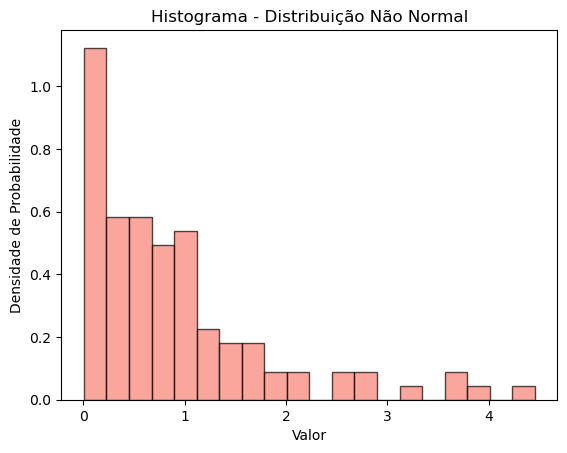

Estatística do teste (não normal): 2.3300789090000813
Os dados podem seguir uma distribuição normal (não rejeitamos H0).


In [28]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from numpy.random import seed

# Definir uma semente para tornar o exemplo reproduzível
seed(0)

# Função para calcular os coeficientes de Shapiro-Francia
def shapiro_francia_coeficientes(n):
    coef_a = np.zeros(7)
    coef_a[0] = 0.473
    coef_a[1] = 0.321
    coef_a[2] = 0.14
    coef_a[3] = 0.04
    coef_a[4] = 0.004
    coef_a[5] = 0.0001
    coef_a[6] = 0.0000001

    coef_b = np.zeros(7)
    coef_b[0] = 1.932
    coef_b[1] = 0.862
    coef_b[2] = 0.0678
    coef_b[3] = 0.0084
    coef_b[4] = 0.00184
    coef_b[5] = 0.000246
    coef_b[6] = 0.00000001

    k = np.floor(n / 2)
    if k < 7:
        return coef_a[k - 1], coef_b[k - 1]
    else:
        return coef_a[6] / np.sqrt(k), coef_b[6] / np.sqrt(k)

# Função para calcular a estatística de Shapiro-Francia
def shapiro_francia_estatistica(data):
    n = len(data)
    sorted_data = np.sort(data)
    u = np.linspace(1, n, n) / (n + 1)
    z = st.norm.ppf(u)
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)
    z_expected = (sorted_data - mu) / sigma
    a, b = shapiro_francia_coeficientes(n)
    z_expected = a * z_expected + b * (z_expected ** 2 - 1)
    z_diff = z_expected - z
    return np.max(np.abs(z_diff))

# Gerar uma amostra de uma distribuição exponencial
sample_non_normal = np.random.exponential(scale=1, size=100)

# Calcular a estatística de Shapiro-Francia para a amostra não normal
statistic_non_normal = shapiro_francia_estatistica(sample_non_normal)

# Histograma dos dados da distribuição não normal
plt.hist(sample_non_normal, bins=20, density=True, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Histograma - Distribuição Não Normal')
plt.xlabel('Valor')
plt.ylabel('Densidade de Probabilidade')
plt.show()

# Exibir o resultado do teste de Shapiro-Francia para a distribuição não normal
print("Estatística do teste (não normal):", statistic_non_normal)

# Interpretar o resultado do teste de Shapiro-Francia
alpha = 0.05
if statistic_non_normal <= alpha:
    print("Os dados não seguem uma distribuição normal (rejeitamos H0). Isso sugere que a distribuição dos dados é significativamente diferente de uma distribuição normal, pois a estatística de teste ultrapassou o valor crítico.")
else:
    print("Os dados podem seguir uma distribuição normal (não rejeitamos H0).")



## TESTES PARA HOMOGENEIDADE DE VARIÂNCIAS : O Teste χ2 de Bartlett


<fieldset>
    <p>O teste original proposto para verificar a homogeneidade de variâncias entre grupos é o teste χ2 de Bartlett (1937), ou seja, é um método estatístico utilizado para verificar se a <strong>variância</strong> entre vários grupos é igual.</p>
    <p>As hipóteses nulas e alternativas do teste de Bartlett são as seguintes:</p>
<div style="border:2px solid black; padding: 10px; background-color:#ffffcc">
    <ul>
        <li><strong>H0</strong>: A variância é a mesma para todos os grupos.</li>
        <li><strong>HA</strong>: Pelo menos um grupo tem uma variância que é diferente dos outros.</li>
    </ul>  </div>
    <p>No código, geramos uma lista de amostras aleatórias para cada grupo usando a função np.random.normal para gerar amostras de uma distribuição normal e np.random.uniform para gerar o desvio padrão para cada grupo. Em seguida, aplicamos o teste de Bartlett às amostras usando a função stats.bartlett da biblioteca scipy.stats. Esta função retorna a estatística de teste e o valor-p.</p>
    <p>Se o valor-p for menor que 0.05, rejeitamos a hipótese nula. Isso significa que pelo menos um grupo tem uma variância que é diferente dos outros.</p>
</fieldset>

### Exemplo e Verificação se nossos dados estão normalmente distribuídos

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


'''Suponha que somos um pesquisadores e coletamos dados de três diferentes espécies de plantas. 
Queremos saber se a altura das plantas varia significativamente entre as espécies.

-> H0 (Hipótese Nula): A variância da altura das plantas é a mesma para todas as três espécies. 
    Isso significa que não há diferença significativa na variabilidade da altura entre as espécies.

-> HA (Hipótese Alternativa): Pelo menos uma espécie tem uma variância de altura que é diferente das outras. 
    Isso significa que há uma diferença significativa na variabilidade da altura entre pelo menos duas espécies.'''

num_species = 3
num_plants = 600

# Gerando alturas para três espécies diferentes
np.random.seed(42)  # Para reprodutibilidade
species_1 = np.random.normal(loc=150, scale=20, size=num_plants)
species_2 = np.random.normal(loc=160, scale=22, size=num_plants)
species_3 = np.random.normal(loc=155, scale=18, size=num_plants)

# Função para plotar histograma e Q-Q plot e Verificar se os dados estão normalmente distribuídos
def plot_data(data, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(data, bins='auto')
    plt.title(f"Histograma das Alturas - {title}")

    plt.subplot(1, 2, 2)
    stats.probplot(data, plot=plt)
    plt.title(f"Gráfico Q-Q das Alturas - {title}")

    plt.show()

    # Teste de Shapiro-Wilk para normalidade
    stat, p = stats.shapiro(data)
    print(f"{title} - Estatística de teste: {stat}, Valor-p: {p}")
    if p > 0.05:
        print(f"{title} parece ser normalmente distribuído (p > 0.05).\n")
    else:
        print(f"{title} não parece ser normalmente distribuído (p <= 0.05).\n")

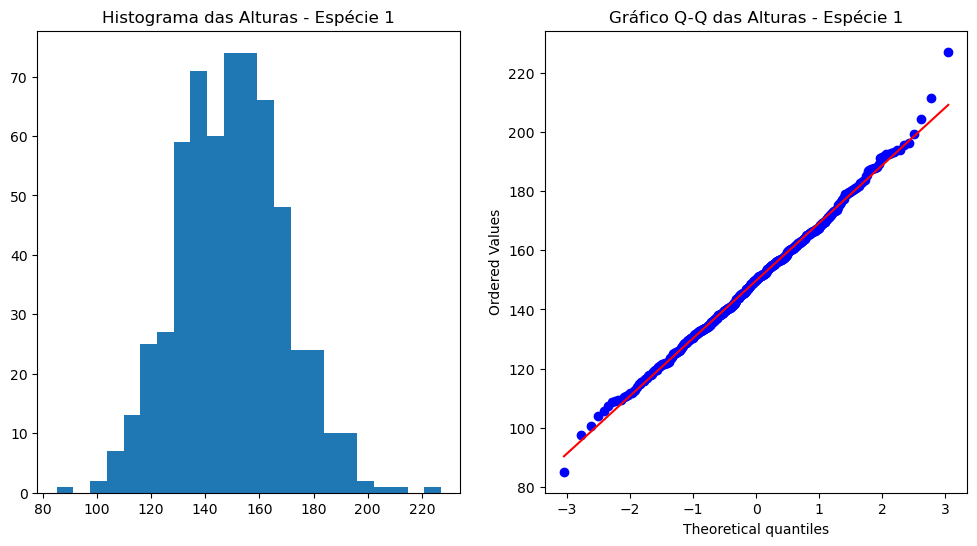

Espécie 1 - Estatística de teste: 0.9973317384719849, Valor-p: 0.4455067813396454
Espécie 1 parece ser normalmente distribuído (p > 0.05).



In [21]:
plot_data(species_1, "Espécie 1")

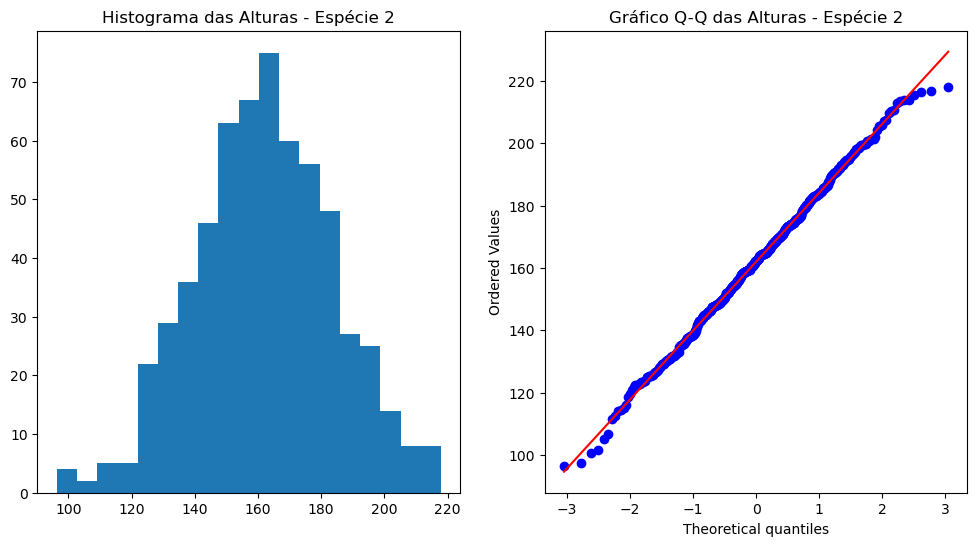

Espécie 2 - Estatística de teste: 0.9975175261497498, Valor-p: 0.5150929689407349
Espécie 2 parece ser normalmente distribuído (p > 0.05).



In [22]:
plot_data(species_2, "Espécie 2")

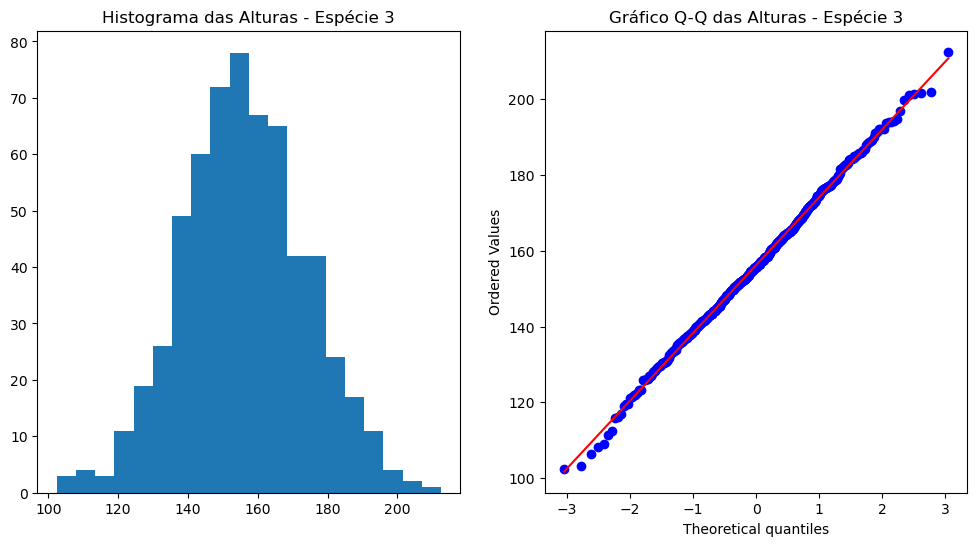

Espécie 3 - Estatística de teste: 0.9984819293022156, Valor-p: 0.8906087875366211
Espécie 3 parece ser normalmente distribuído (p > 0.05).



In [23]:
plot_data(species_3, "Espécie 3")

In [26]:
# H0: A variância da altura é a mesma para todas as espécies
# HA: Pelo menos uma espécie tem uma variância de altura que é diferente das outras

# Teste de Bartlett para igualdade de variâncias
stat, p = stats.bartlett(species_1, species_2, species_3)
print(f"Teste de Bartlett - Estatística: {stat}, Valor-p: {p}")

if p > 0.05:
    print("\nNão há evidência suficiente para rejeitar a hipótese nula de igualdade de variâncias entre as espécies.")
else:
    print("\nHá evidências para rejeitar a hipótese nula de igualdade de variâncias entre as espécies.")


Teste de Bartlett - Estatística: 27.564865765258332, Valor-p: 1.0336308237438144e-06

Há evidências para rejeitar a hipótese nula de igualdade de variâncias entre as espécies.
